# Pandas

Pandas is a library for tabular data (dataframe).

In [27]:
import pandas as pd
import numpy as np

In [74]:
df = pd.DataFrame(np.random.randn(100, 2), columns=['x', 'y'])
df.head()

,x,y
0,1.012181,-0.077271
1,1.287084,-0.330829
2,-1.162034,0.167187
3,-0.319899,-0.548682
4,0.821274,-0.565926


In [29]:
df.shape

(100, 2)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [3]:
df.describe()

,x,y
count,100.000000,100.000000
mean,-0.190087,-0.028231
std,0.855097,0.879615
min,-2.183391,-1.905329
25%,-0.811593,-0.705061
50%,-0.230736,-0.134842
75%,0.405774,0.646319
max,1.551795,1.802841


In [75]:
dates = pd.date_range("20210101", periods=100)
dates[0:5]

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05'],
              dtype='datetime64[ns]', freq='D')

In [76]:
df = pd.DataFrame(np.random.randn(100, 2), columns=['x', 'y'], index=dates)
df.head()

,x,y
2021-01-01,-1.823644,-1.357490
2021-01-02,0.407033,0.140167
2021-01-03,-0.219090,1.195670
2021-01-04,1.280075,0.955749
2021-01-05,1.201438,-1.155646


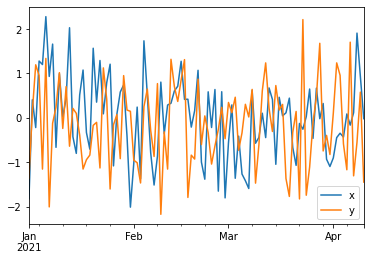

In [78]:
df.plot();

In [6]:
df['2021-02-11':'2021-02-15']

,x,y
2021-02-11,-0.135543,-1.036254
2021-02-12,2.016705,0.791184
2021-02-13,0.656834,-0.423262
2021-02-14,-0.630841,1.101213
2021-02-15,1.684871,1.491705


In [7]:
df.loc[df.x < 0.5]

,x,y
2021-01-01,-1.077120,0.342451
2021-01-03,0.071963,-0.305716
2021-01-04,0.469240,0.098572
2021-01-06,-0.333955,-0.482170
2021-01-08,-0.384534,-0.758705
...,...,...
2021-04-06,-0.907123,2.424140
2021-04-07,-0.280448,0.262274
2021-04-08,-0.477009,2.236021
2021-04-09,-0.141062,2.128535


In [8]:
df['label'] = [chr(97 + int(num)) for num in abs(df.x.values) * 10]

In [9]:
df.head()

,x,y,label
2021-01-01,-1.077120,0.342451,k
2021-01-02,2.723008,0.196346,|
2021-01-03,0.071963,-0.305716,a
2021-01-04,0.469240,0.098572,e
2021-01-05,1.226176,1.319617,m


In [10]:
df.loc[df.label == 'a']

,x,y,label
2021-01-03,0.071963,-0.305716,a
2021-02-25,0.091595,1.604293,a
2021-03-12,0.088501,-0.170577,a
2021-03-31,0.026616,0.661760,a
2021-04-01,0.096728,-2.732678,a


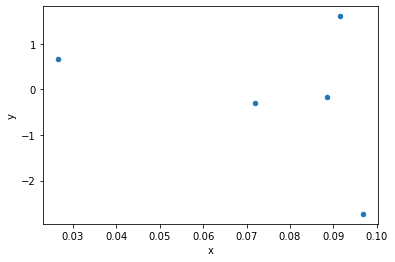

In [11]:
df.loc[df.label == 'a'].plot('x', 'y', kind='scatter');

In [17]:
df.groupby(by=df["label"])

In [16]:
df.groupby(by=df["label"]).sum()

,x,y
label,,
a,0.375404,-0.942918
b,0.057332,-0.963949
c,0.211865,-2.870494
d,0.435584,-3.043571
e,-0.327597,4.056683
f,1.248295,0.227028
g,0.699617,1.612593
h,0.739751,0.201644
i,0.925425,-1.960625


In [63]:
df1 = pd.DataFrame(np.random.randn(5, 2), columns=['x', 'y'])
df2 = pd.DataFrame(np.random.randn(5, 2), columns=['x', 'y'])

In [64]:
df1

,x,y
0,1.065447,0.508669
1,-0.111200,0.029376
2,0.251230,-0.855050
3,-0.206806,-1.267250
4,-0.195877,-0.586469


In [65]:
df2

,x,y
0,1.879820,-1.054090
1,0.834352,-2.434033
2,-0.915162,3.600316
3,-0.781719,0.633350
4,-0.003787,-0.752671


In [71]:
pd.concat([df1, df2], ignore_index=True)

,x,y
0,1.065447,0.508669
1,-0.111200,0.029376
2,0.251230,-0.855050
3,-0.206806,-1.267250
4,-0.195877,-0.586469
5,1.879820,-1.054090
6,0.834352,-2.434033
7,-0.915162,3.600316
8,-0.781719,0.633350
9,-0.003787,-0.752671


In [72]:
df_titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


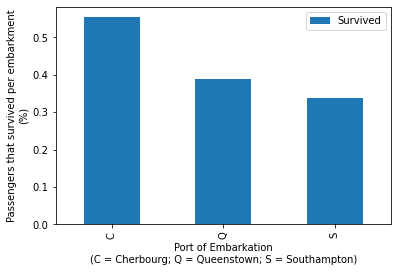

In [73]:
df_titanic_grouped = df_titanic.groupby('Embarked')

(df_titanic_grouped.sum() / df_titanic_grouped.count()).plot.bar(
    y='Survived',
    ylabel='Passengers that survived per embarkment\n(%)',
    xlabel='Port of Embarkation\n(C = Cherbourg; Q = Queenstown; S = Southampton)'
);

In [25]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]],
    sep=',',
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: str = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    dialect=None,
    error_bad_lines=True,
    warn_bad_l

For more information, see the [documentation](https://pandas.pydata.org/).